In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%precision 3
%matplotlib inline

In [2]:
# 母集団を設定
population = stats.norm(loc=4, scale=0.8)

In [3]:
sample_mean_array = np.zeros(10000)

In [4]:
# 標本平均を10000個ほど生成する
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size=10)
    sample_mean_array[i] = sp.mean(sample)

In [5]:
sample_mean_array

array([3.922, 3.864, 4.07 , ..., 4.136, 4.575, 4.099])

In [6]:
# 標本平均の平均を計算する
# 標本平均の平均は、母平均に近い
sp.mean(sample_mean_array)

4.004202422791747

In [7]:
# 標本平均の標準偏差を計算する
# 標本平均の標準偏差は、母標準偏差より小さい
sp.std(sample_mean_array, ddof=1)

0.2513580850860402

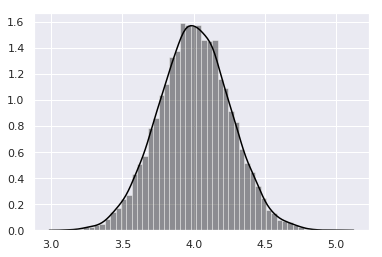

In [8]:
# 標本平均のヒストグラム
sns.distplot(sample_mean_array, color='black')

In [9]:
# サンプルサイズが大きくなると標本平均が母平均に収束する様子を見たい
# 初項が10で公差が100の等差数列を用意する
size_array = np.arange(start=10, stop=100100, step=100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [10]:
# 標本平均を格納する箱を用意する
sample_mean_array_size = np.zeros(len(size_array))

In [11]:
# サンプルサイズが大きくなるほど標本平均が母平均に収束する様子をみる
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size=size_array[i])
    sample_mean_array_size[i] = sp.mean(sample)

Text(0, 0.5, 'sample mean')

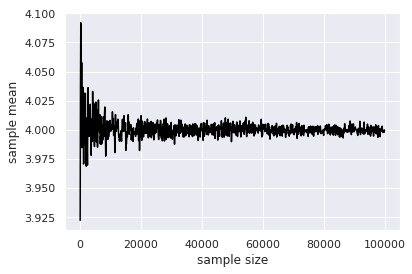

In [12]:
plt.plot(size_array, sample_mean_array_size, color='black')
plt.xlabel('sample size')
plt.ylabel('sample mean')

In [13]:
# 標本平均をなんども計算する関数を用意する
def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample = population.rvs(size=size)
        sample_mean_array[i] = sp.mean(sample)
    return sample_mean_array

# 上の関数から、「データを10個選んで標本平均を得る」試行を10000回繰り返し、標本平均の平均値を求める
np.random.seed(1)
sp.mean(calc_sample_mean(size=10, n_trial=10000))

4.004202422791747

In [14]:
np.random.seed(1)

# 「データを10個選んで標本平均を得る」試行を10000回繰り返して得たデータフレーム
size_10 = calc_sample_mean(size=10, n_trial=10000)
size_10_df = pd.DataFrame({
    'sample_mean': size_10,
    'size': np.tile('size 10', 10000)
})

# 「データを20個選んで標本平均を得る」試行を10000回繰り返して得たデータフレーム
size_20 = calc_sample_mean(size=20, n_trial=10000)
size_20_df = pd.DataFrame({
    'sample_mean': size_20,
    'size': np.tile('size 20', 10000)
})

# 「データを30個選んで標本平均を得る」試行を10000回繰り返して得たデータフレーム
size_30 = calc_sample_mean(size=30, n_trial=10000)
size_30_df = pd.DataFrame({
    'sample_mean': size_30,
    'size': np.tile('size 30', 10000)
})

# 結合
sim_result = pd.concat(
    [size_10_df, size_20_df, size_30_df]
)
# 結果の表示
print(sim_result.head())

   sample_mean     size
0     3.922287  size 10
1     3.864329  size 10
2     4.069530  size 10
3     3.857140  size 10
4     4.184654  size 10


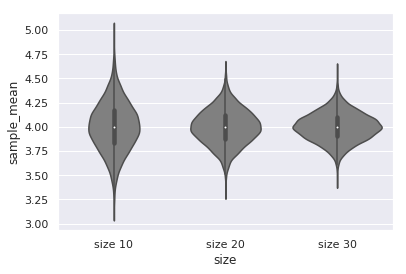

In [15]:
# 標本平均を計算する時のサンプルサイズが大きいほど、標本平均のばらつきは小さくなる
sns.violinplot(x='size', y='sample_mean', data=sim_result, color='gray')

In [16]:
# 標本平均の標準偏差は、母標準偏差よりも小さくなる様子をみたい
# 初項が2で公差が2の等差数列を用意する
size_array = np.arange(start=2, stop=102, step=2)
size_array

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [17]:
# 「標本平均の標準偏差」を格納する入れ物を用意する
sample_mean_std_array = np.zeros(len(size_array))

In [18]:
np.random.seed(1)
for i in range(0, len(size_array)):
    sample_mean = calc_sample_mean(size=size_array[i], n_trial=100)
    sample_mean_std_array[i] = sp.std(sample_mean, ddof=1)

Text(0, 0.5, 'mean_std value')

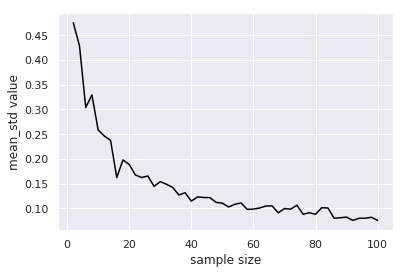

In [19]:
# サンプルサイズが大きくなるほど、信頼のできる標本平均が得られることがわかる
plt.plot(size_array, sample_mean_std_array, color='black')
plt.xlabel('sample size')
plt.ylabel('mean_std value')

In [20]:
# 標準誤差: 標本平均の標準偏差の理論値
# 標準誤差 = 母分散/sqrt(標本サンプルサイズ)
standard_error = 0.8 / np.sqrt(size_array)
standard_error

array([0.566, 0.4  , 0.327, 0.283, 0.253, 0.231, 0.214, 0.2  , 0.189,
       0.179, 0.171, 0.163, 0.157, 0.151, 0.146, 0.141, 0.137, 0.133,
       0.13 , 0.126, 0.123, 0.121, 0.118, 0.115, 0.113, 0.111, 0.109,
       0.107, 0.105, 0.103, 0.102, 0.1  , 0.098, 0.097, 0.096, 0.094,
       0.093, 0.092, 0.091, 0.089, 0.088, 0.087, 0.086, 0.085, 0.084,
       0.083, 0.083, 0.082, 0.081, 0.08 ])

Text(0, 0.5, 'mean_std value')

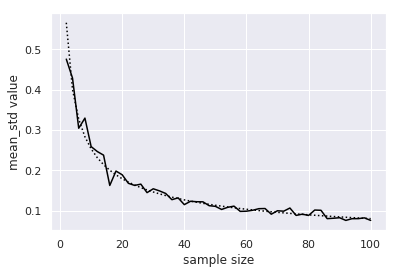

In [21]:
# 「標本平均の標準偏差」と、標準誤差がだいたい一致することを確認する
plt.plot(size_array, sample_mean_std_array, color='black')
plt.plot(size_array, standard_error, color='black', linestyle='dotted')
plt.xlabel('sample size')
plt.ylabel('mean_std value')

In [22]:
# 標本分散について考える
# 標本分散を格納する入れ物を用意する
sample_var_array = np.zeros(10000)

In [23]:
# 「データを10個選んで標本分散求める」試行を10000回くりかえす
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size=10)
    sample_var_array[i] = sp.var(sample, ddof=0)

In [24]:
# 標本分散の平均値
# 母分散は0.8の2乗で0.64になるが、母分散より小さいことがわかる
sp.mean(sample_var_array)

0.5746886877332101

In [25]:
# 標本分散の代わりに不偏分散を使う
unbias_var_array = np.zeros(10000)
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size=10)
    unbias_var_array[i] = sp.var(sample, ddof=1)

# 不偏分散の平均値は、母分散の近似値になることがわかる
sp.mean(unbias_var_array)

0.6385429863702334

In [26]:
# サンプルサイズが大きくなるほど、不偏分散が母分散に近づく様子をみたい
size_array = np.arange(start=10, stop=100100, step=100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [27]:
# 不偏分散を格納する入れ物を用意する
unbias_var_array_size = np.zeros(len(size_array))

In [28]:
# 「不偏分散を求める」試行を、サンプルサイズを変えながらなんども実行して、結果を入れ物にいれる
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size=size_array[i])
    unbias_var_array_size[i] = sp.var(sample, ddof=1)

Text(0, 0.5, 'unbias var')

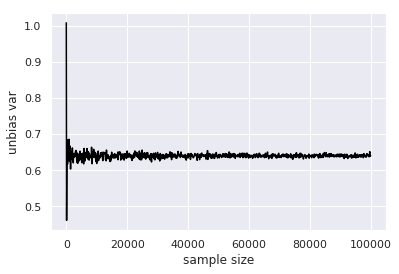

In [29]:
# プロットすると、サンプルサイズが大きくなるごとに不偏分散が母分散に近づいていくことがわかる
plt.plot(size_array, unbias_var_array_size, color='black')
plt.xlabel('sample size')
plt.ylabel('unbias var')

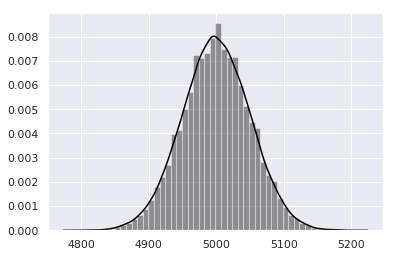

In [30]:
# 標本の統計量の期待値が母数(母集団の統計量)と一致する特性を「不偏性」という
# 標本の大きさが大きくなるにつれて、統計量が母数（母集団の統計量）にちかづく特性を「一致性」という
# 標本の大きさが大きくなるにつれて、標本平均が母平均にちかづく特性を「大数の法則」という
# 母集団分布がどんな形であれ（正規分布に従わなくとも）、標本の大きさが大きくなるにつれて確率変数の合計値は正規分布にちかづく特性を「中心極限定理」という
# 以下は中心極限定理を示す
n_size = 10000
n_trial = 50000
coin = np.array([0, 1])
count_coin = np.zeros(n_trial)
np.random.seed(1)
for i in range(0, n_trial):
    count_coin[i] = sp.sum(np.random.choice(coin, size=n_size, replace=True))
sns.distplot(count_coin, color='black')